In [14]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from utilities import *

In [44]:
#Load signal 
data = pd.read_csv('chbmit_preprocessed_data.csv')
data.columns
grouped_data = data.groupby('Outcome')
preictal_data = grouped_data.get_group(0)
ictal_data = grouped_data.get_group(1)
#  data exploration 
print(preictal_data.columns)
print(preictal_data.shape)
print(ictal_data.shape)
print(preictal_data.shape[0]/(256*60)) # print length of recording in minutes, 256 is sampling frequency

Index(['# FP1-F7', 'C3-P3', 'C4-P4', 'CZ-PZ', 'F3-C3', 'F4-C4', 'F7-T7',
       'F8-T8', 'FP1-F3', 'FP2-F4', 'FP2-F8', 'FT10-T8', 'FT9-FT10', 'FZ-CZ',
       'P3-O1', 'P4-O2', 'P7-O1', 'P7-T7', 'P8-O2', 'T7-FT9', 'T7-P7',
       'T8-P8-0', 'T8-P8-1', 'Outcome'],
      dtype='object')
(1048575, 24)
(1048575, 24)
68.2666015625


In [16]:
# create trials split data to train and test
subsetted_preictal, labels_preictal = subset_trials(preictal_data,1)
subsetted_ictal, labels_ictal = subset_trials(ictal_data,1)
all_trials = np.concatenate((subsetted_preictal,subsetted_ictal), axis=0) # 136 * 15360 * 23
all_labels = np.concatenate((labels_preictal,labels_ictal), axis=0) #Zero is preictal, 1 is ictal

print(all_trials)
print(all_labels)


[[[ 1.97000e-05  1.04000e-05  2.21000e-05 ...  1.15000e-05  2.09000e-05
    2.09000e-05]
  [ 2.21000e-05  8.01000e-06  2.09000e-05 ...  8.79000e-06  2.25000e-05
    2.25000e-05]
  [ 2.13000e-05  1.15000e-05  2.09000e-05 ...  9.18000e-06  2.72000e-05
    2.72000e-05]
  ...
  [-3.38000e-05 -8.19000e-05 -2.13000e-05 ... -1.04000e-05 -3.32000e-06
   -3.32000e-06]
  [-3.46000e-05 -9.24000e-05 -2.75000e-05 ... -1.04000e-05 -1.39000e-05
   -1.39000e-05]
  [-3.54000e-05 -1.00611e-04 -3.89000e-05 ... -6.84000e-06 -2.72000e-05
   -2.72000e-05]]

 [[-3.54000e-05 -9.94000e-05 -5.53000e-05 ... -5.67000e-06 -4.63000e-05
   -4.63000e-05]
  [-4.04000e-05 -9.87000e-05 -7.37000e-05 ... -5.27000e-06 -6.58000e-05
   -6.58000e-05]
  [-4.94000e-05 -1.05299e-04 -9.67000e-05 ... -5.27000e-06 -8.03000e-05
   -8.03000e-05]
  ...
  [ 2.44000e-05  8.40000e-06  4.55000e-05 ...  2.75000e-05  1.54000e-05
    1.54000e-05]
  [ 2.79000e-05  3.32000e-06  3.54000e-05 ...  1.93000e-05  1.78000e-05
    1.78000e-05]
  [ 2.5

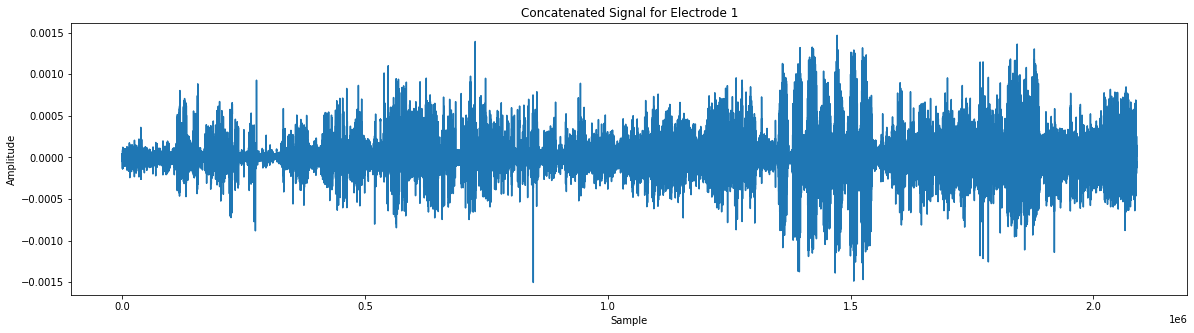

In [17]:
import matplotlib.pyplot as plt

# Select the electrode to plot
electrode_to_plot = 0

# Plot the concatenated signal for the selected electrode
plt.figure(figsize=(20,5))
plt.plot(all_trials[:, :, electrode_to_plot].flatten())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Concatenated Signal for Electrode {}'.format(electrode_to_plot+1))
plt.show()

In [18]:
print(entropy(all_trials))

[[-0.0805865449629545, -0.08519354695693329, -0.09750773419690459, -0.10352406457193936, -0.0488912219192483, -0.09034170310384611, -0.08744947219028362, 0.0019156486545538615, -0.1576909515248626, -0.13403286534375497, -0.15888156401955444, -0.1294331941570052, -0.07227922391536051, -0.11051462902614358, 0.004672016532050988, 0.07149203819407038, -0.09689132250764995, -0.05429428497966903, 0.020053281135235496, -0.06292573563832021, -0.0707446080666469, -0.10038561146597974, -0.10038561146597974], [-0.01728470834460602, 0.00858804686834573, -0.045190800047270774, -0.25392623509343243, -0.09106306685619055, -0.06296975577848518, 0.1018414889311135, -0.17704841859275705, 0.1278068420282789, -0.05796303721067846, -0.061963046351593415, -0.3452254682233189, 0.2528666808866527, -0.026563909296450347, -0.02426334851264477, -0.22585510889524574, -0.04557467344797635, -0.047298975959200726, -0.24449685958188405, -0.2801277763520373, -0.06885999976182419, 0.12045939630401194, 0.120459396304011

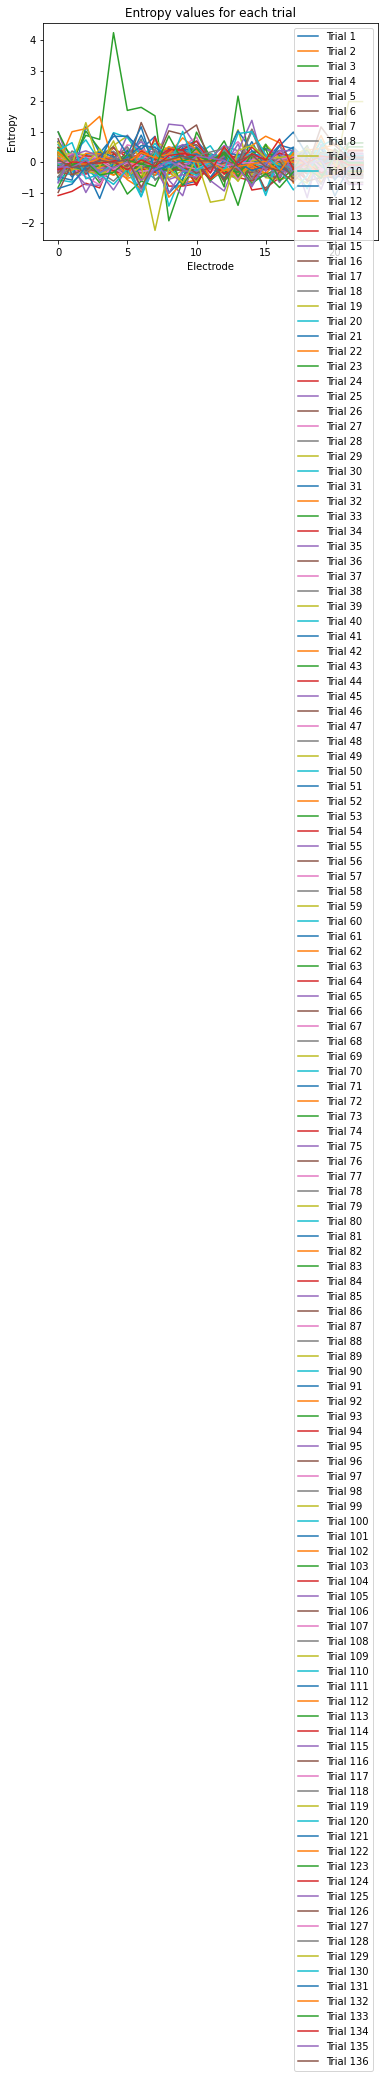

In [27]:
# Assuming you have the signal variable defined as an array
entropy_values = entropy(all_trials)

# Plotting the entropy values for each trial
for i in range(len(entropy_values)):
    plt.plot(entropy_values[i], label=f'Trial {i+1}')

plt.xlabel('Electrode')
plt.ylabel('Entropy')
plt.title('Entropy values for each trial')
plt.legend()
plt.show()

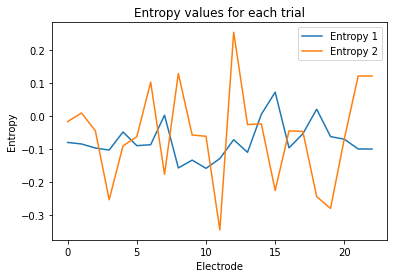

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Compute entropy values
entropy_values = entropy(all_trials)

# Plot the first two entropy values
plt.plot(entropy_values[0], label='Entropy 1')
plt.plot(entropy_values[1], label='Entropy 2')

plt.xlabel('Electrode')
plt.ylabel('Entropy')
plt.title('Entropy values for each trial')
plt.legend()
plt.show()


In [32]:
print(extract_features(all_trials))

[[ 1.15000000e+00  4.58333333e+00  1.15333333e+01 ...  1.36416361e-12
  -1.58975939e-01  5.85830717e+00]
 [ 8.16666667e-01  4.18333333e+00  1.07666667e+01 ...  3.01896549e-11
  -2.28312897e+00  6.31526649e+01]
 [ 8.50000000e-01  4.55000000e+00  1.03833333e+01 ...  9.10035173e-11
   1.02079434e+00  2.28993860e+01]
 ...
 [ 3.91666667e+00  4.36666667e+00  8.40000000e+00 ...  1.11564041e-09
  -2.38248451e-01  1.65304546e+01]
 [ 2.93333333e+00  4.73333333e+00  8.03333333e+00 ...  2.37550950e-09
   7.99107166e-02  1.73257030e+01]
 [ 2.01666667e+00  4.33333333e+00  8.56666667e+00 ...  1.22724477e-09
   5.08523468e-01  2.00643235e+01]]


In [33]:
# features = np.concatenate((freq_features(all_trials),stat_features(all_trials)), axis=1)
X_train, X_test, Y_train, Y_test = split_data(extract_features(all_trials),all_labels, 0.4)
trainer = SVC(kernel='sigmoid')
trainer.fit(X_train,Y_train)
print(accuracy_score(Y_test,trainer.predict(X_test)))
# -------------------------
X_test, X_cv, y_test, y_cv = split_data(X_test, Y_test, 0.5, False)

0.9272727272727272


In [34]:
X_train_reduced, X_test_reduced, X_cv_reduced = mutual_info(X_train, X_test, X_cv, Y_train,10)
trainer = SVC(kernel='sigmoid')
trainer.fit(X_train_reduced,Y_train)
print(accuracy_score(y_cv,trainer.predict(X_cv_reduced)), end=' ')

0.9642857142857143 

In [35]:
X_train_reduced, X_test_reduced, X_cv_reduced = pca(X_train, X_test, X_cv, 0.85)

trainer = SVC(kernel='sigmoid')
trainer.fit(X_train_reduced,Y_train)
print(accuracy_score(y_cv,trainer.predict(X_cv_reduced)), end=' ')

0.9285714285714286 

In [36]:
X_train_reduced, X_test_reduced, X_cv_reduced = wilcoxon_test(X_train, X_test, X_cv, Y_train,0.005)

trainer = SVC(kernel='sigmoid')
trainer.fit(X_train_reduced,Y_train)
print(accuracy_score(y_cv,trainer.predict(X_cv_reduced)), end=' ')

0.9642857142857143 